In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Loads the data into a DataFrame
df = pd.read_csv("Resources/filtered_encoded_dataset.csv")

df.head()

,Unnamed: 0,primary_artist,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,...,num_artists_binned_4,num_artists_binned_5,num_artists_binned_6,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
0,0,Gen Hoshino,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,...,0,0,0,0,0,0,0,0,0,1
1,1,Ben Woodward,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,...,0,0,0,0,0,0,0,0,0,1
2,2,Ingrid Michaelson,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,...,0,0,0,0,0,0,0,0,0,1
3,3,Kina Grannis,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,...,0,0,0,0,0,0,0,0,0,1
4,4,Chord Overstreet,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Drop unnecessary columns
df = df.drop("Unnamed: 0", axis=1)
df.head()

,primary_artist,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,num_artists_binned_4,num_artists_binned_5,num_artists_binned_6,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
0,Gen Hoshino,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,...,0,0,0,0,0,0,0,0,0,1
1,Ben Woodward,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,...,0,0,0,0,0,0,0,0,0,1
2,Ingrid Michaelson,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,...,0,0,0,0,0,0,0,0,0,1
3,Kina Grannis,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,...,0,0,0,0,0,0,0,0,0,1
4,Chord Overstreet,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,...,0,0,0,0,0,0,0,0,0,1


## Using the Elbow Method to determine the optimal number of clusters for KMeans

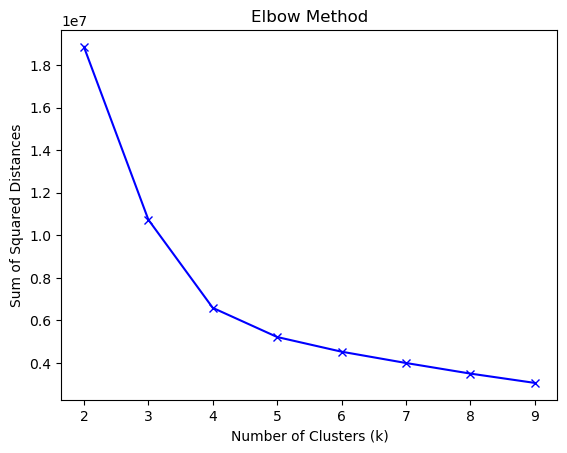

In [20]:
# Select the relevant numerical features for clustering
features = df[['popularity', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness']]

# Define the range of k values to evaluate
k_values = range(2, 10)
inertia_values = []

# Iterate over the range of k values
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the results
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [16]:
# Define the range of k values to evaluate
k_values = range(2, 10)
silhouette_scores = []

# Iterate over the range of k values
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

# Plot the results
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


ValueError: could not convert string to float: 'Gen Hoshino'

In [5]:
# Instantiate the KMeans object
kmeans = KMeans(n_clusters=4) 

# Fit the data to the KMeans model
kmeans.fit(features)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = labels

# View the DataFrame with cluster labels
print(df.head())


      primary_artist                  track_name  popularity  explicit  \
0        Gen Hoshino                      Comedy          73         0   
1       Ben Woodward            Ghost - Acoustic          55         0   
2  Ingrid Michaelson              To Begin Again          57         0   
3       Kina Grannis  Can't Help Falling In Love          71         0   
4   Chord Overstreet                     Hold On          82         0   

   danceability  energy  loudness  mode  speechiness  acousticness  ...  \
0         0.676  0.4610    -6.746     0       0.1430        0.0322  ...   
1         0.420  0.1660   -17.235     1       0.0763        0.9240  ...   
2         0.438  0.3590    -9.734     1       0.0557        0.2100  ...   
3         0.266  0.0596   -18.515     1       0.0363        0.9050  ...   
4         0.618  0.4430    -9.681     1       0.0526        0.4690  ...   

   num_artists_binned_5  num_artists_binned_6  track_genre_0  track_genre_1  \
0                     0  

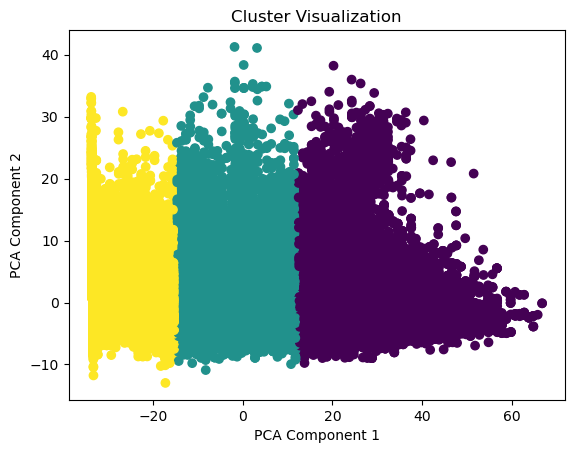

In [6]:
# Select the relevant numerical features for clustering
features = df[['popularity', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness']]

# Instantiate the KMeans object
kmeans = KMeans(n_clusters=3)  # Choose the optimal number of clusters

# Fit the data to the KMeans model
kmeans.fit(features)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Create a DataFrame with PCA features and cluster labels
pca_df = pd.DataFrame({'PCA1': pca_features[:, 0], 'PCA2': pca_features[:, 1], 'Cluster': labels})

# Plot the clusters
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()

In [7]:
df.columns

Index(['primary_artist', 'track_name', 'popularity', 'explicit',
       'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'time_signature_0', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'num_artists_binned_1',
       'num_artists_binned_2', 'num_artists_binned_3', 'num_artists_binned_4',
       'num_artists_binned_5', 'num_artists_binned_6', 'track_genre_0',
       'track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4',
       'track_genre_5', 'track_genre_6', 'cluster'],
      dtype='object')

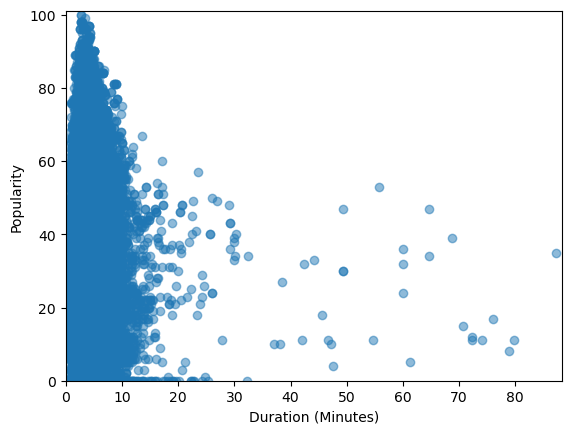

<Figure size 1000x1000 with 0 Axes>

In [16]:
plt.scatter(df['duration_min'], df['popularity'], alpha=0.5)

#Labelling the axes
plt.xlabel('Duration (Minutes)')
plt.ylabel('Popularity')
plt.xlim(0, max(df['duration_min']) + 1)
plt.ylim(0, max(df['popularity']) + 1)

plt.figure(figsize=(10,10))
plt.show()

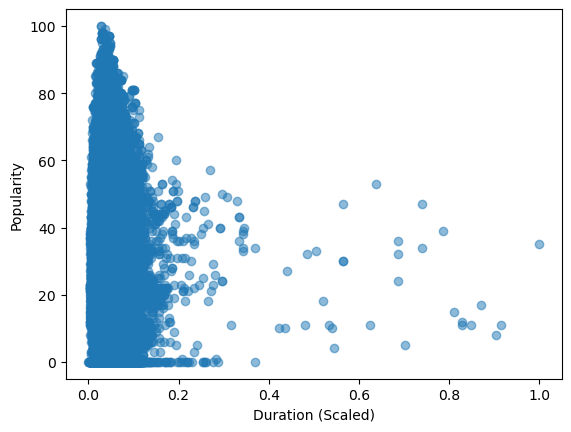

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Scale the 'duration' data
df['duration_scaled'] = scaler.fit_transform(df[['duration_min']])

# Plot the scaled 'duration' data
plt.scatter(df['duration_scaled'], df['popularity'], alpha=0.5)
plt.xlabel('Duration (Scaled)')
plt.ylabel('Popularity')
plt.show()

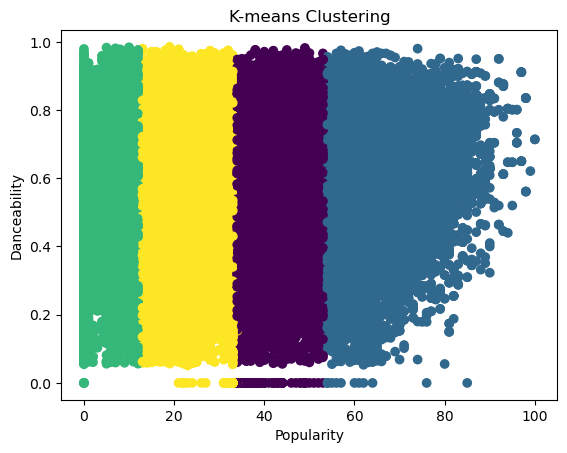

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Select the relevant features for clustering
features = df[['popularity', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness']]

# Instantiate the KMeans object
kmeans = KMeans(n_clusters=4)  # Specify the desired number of clusters

# Fit the data to the KMeans model
kmeans.fit(features)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['cluster'] = labels

# Create a scatter plot
plt.scatter(df['popularity'], df['danceability'], c=df['cluster'], cmap='viridis')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('K-means Clustering')

# Show the plot
plt.show()

In [25]:
df.columns

Index(['primary_artist', 'track_name', 'popularity', 'explicit',
       'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'time_signature_0', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'num_artists_binned_1',
       'num_artists_binned_2', 'num_artists_binned_3', 'num_artists_binned_4',
       'num_artists_binned_5', 'num_artists_binned_6', 'track_genre_0',
       'track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4',
       'track_genre_5', 'track_genre_6', 'cluster', 'duration_scaled',
       'duration_bins'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

# Scaling the numeric columns
data_scaled = StandardScaler().fit_transform(df[["popularity", "loudness"]])

# Creating a DataFrame with with the scaled data
df_transformed = pd.DataFrame(data_scaled, columns=["popularity", "loudness"])

# Display sample data
df_transformed.head()

,popularity,loudness
0,1.780470,0.298800
1,0.972707,-1.794228
2,1.062459,-0.297440
3,1.690719,-2.049645
4,2.184352,-0.286864
